<a id="Reducción de Dimensionalidad"></a>
# <u>Reducción de Dimensionalidad</u>

La reducción de dimensionalidad es el proceso de reducir la dimensión del conjunto de características manteniendo su estructura y utilidad.

## <u>Razones para la reducción de dimensionalidad</u>

- La mayoría de los puntos en un hipercubo de alta dimensionalidad están muy cerca del borde y corren el riesgo de ser muy dispersos, lo que hace que las predicciones sean mucho menos confiables que en dimensiones más bajas.
- Un número muy grande de características para cada instancia de entrenamiento puede hacer que el entrenamiento sea extremadamente lento.
- Es difícil visualizar un conjunto de datos que contenga un gran número de características.

## <u>Pros</u>

- Menor tiempo en entrenar el conjunto de datos.
- Visualización fácil del conjunto de datos que contiene 2 o 3 características principales.
- Puede (o no) resultar en un mejor rendimiento.

## <u>Contras</u>

- Pérdida de información.

La reducción de dimensionalidad se puede lograr de las siguientes maneras:

- <b> Eliminación de Características </b>: Reducimos el espacio de características eliminando características. Sin embargo, esto tiene la desventaja de que no obtenemos información de las características que eliminamos.

- <b> Selección de Características </b>: Aplicamos algunas pruebas estadísticas para clasificarlas según su importancia y luego seleccionamos un subconjunto de características para nuestro trabajo. Esto también sufre de pérdida de información y es menos estable, ya que diferentes pruebas otorgan diferentes puntuaciones de importancia a las características.

- <b> Extracción de Características </b>: Creamos nuevas características independientes, donde cada nueva característica independiente es una combinación de las antiguas características independientes. Estas técnicas se pueden dividir en técnicas de reducción de dimensionalidad lineales (PCA, SVD) y no lineales (t-SNE).


<a id="Enfoques Principales para la Reducción de Dimensionalidad"></a>
## <u>Enfoques Principales para la Reducción de Dimensionalidad</u>

### <u>Proyección</u>

Proyectar datos de alta dimensionalidad en un hiperplano de baja dimensionalidad, minimizando la varianza. (PCA)

### <u>Aprendizaje de Variedades</u>

En muchos casos donde el subespacio puede torcerse y girar (como en el Swiss roll), la proyección no es el mejor enfoque para la reducción de dimensionalidad. Las técnicas de Aprendizaje de Variedades miden cómo cada instancia de entrenamiento se relaciona linealmente con sus vecinos más cercanos, luego buscan una representación de baja dimensionalidad del conjunto de entrenamiento donde estas relaciones locales se preserven de la mejor manera posible.


<a id="Proyección"></a>
## <u>Proyección</u>

<a id="PCA - Análisis de Componentes Principales"></a>
### <u>PCA - Análisis de Componentes Principales (PCA Básico)</u>
- El análisis de componentes principales es el principal método utilizado para la reducción de dimensionalidad lineal.
- Realiza un mapeo lineal de los datos a un espacio de menor dimensionalidad de tal manera que la varianza de los datos en la representación de baja dimensionalidad se maximice. Con la máxima varianza, se preserva la mayor cantidad de información posible. En otras palabras, selecciona el/los hiperplano(s) que minimizan la distancia media cuadrática entre el conjunto de datos original y su proyección en dicho(s) hiperplano(s).
- El primer componente principal explica la mayor varianza en los datos, y así sucesivamente...
- Todos los componentes en el espacio de baja dimensionalidad están linealmente no correlacionados.
- Cada una de las nuevas características o componentes creados después de aplicar PCA son independientes entre sí.


In [1]:
from sklearn.datasets import load_iris
import pandas as pd

<a id="PCA para Visualización de Datos y Reducción de Dimensionalidad"></a>
### <u>Aplicación 1: PCA para Visualización de Datos y Reducción de Dimensionalidad</u>


In [2]:
# Cargar el dataset de Iris desde sklearn
iris = load_iris()

# Convertir a DataFrame para que sea similar al formato que tenías
Iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Agregar la columna de la especie (y)
Iris['Species'] = iris.target

# Asignar X y y
X = Iris[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = Iris['Species']


<a id="Estandarización"></a>
### <u>Paso 1: Estandarización</u>

Los datos no estandarizados son sensibles a las variaciones de las variables iniciales. Las variables con rangos mayores dominan sobre aquellas con rangos más pequeños (una variable que varía entre 0 y 100 dominará sobre una que varía entre 0 y 1), lo que conduce a resultados sesgados. Transformar los datos a escalas comparables evita este problema.

Matemáticamente, esto se puede hacer restando la media (o la media empírica - la media muestral de cada columna desplazada a cero) y dividiendo por la desviación estándar para cada valor de cada variable.


In [2]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

<a id="Descomposición en Valores Propios"></a>
### <u>Paso 2: Descomposición en Valores Propios - Cálculo de Vectores y Valores Propios</u>

Los vectores propios y los valores propios de una matriz de covarianza (o de correlación) representan el "núcleo" de un PCA: Los vectores propios (componentes principales) determinan las direcciones del nuevo espacio de características, y los valores propios determinan su magnitud. En otras palabras, los valores propios explican la varianza de los datos a lo largo de los nuevos ejes de características.

#### <u>Matriz de Covarianza</u>

El enfoque clásico del PCA es realizar la descomposición en valores propios sobre la matriz de covarianza, que es una matriz donde cada elemento representa la covarianza entre dos características. La covarianza entre dos características se calcula de la siguiente manera:


$$Cov(𝑋, 𝑌 ) = \frac{\sum(x_i - \bar{x}) (y_i - \bar{y})}{N-1}$$

In [3]:
import numpy as np

X_mean = np.mean(X, axis=0)
# cov_mat = np.cov(X)
cov_mat = (X - X_mean).T.dot((X - X_mean)) / (X.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


A continuación, realizamos una descomposición en valores propios sobre la matriz de covarianza:

Los tres enfoques producen los mismos pares de vectores propios y valores propios:

- Descomposición en valores propios de la matriz de covarianza después de estandarizar los datos.
- Descomposición en valores propios de la matriz de correlación.
- Descomposición en valores propios de la matriz de correlación después de estandarizar los datos.


In [4]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.93035378 0.92740362 0.14834223 0.02074601]


#### <u>Descomposición en Valores Singulares</u>

Aunque la descomposición en valores propios de la matriz de covarianza o correlación puede ser más intuitiva, la mayoría de las implementaciones de PCA utilizan una Descomposición en Valores Singulares (SVD) para mejorar la eficiencia computacional. Por lo tanto, realicemos una SVD para confirmar que los resultados son, de hecho, los mismos:


In [5]:
u,s,v = np.linalg.svd(X.T)
u

array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
       [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
       [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
       [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]])

<a id="Seleccionando Componentes Principales"></a>
### <u>Paso 3: Seleccionar Componentes Principales</u>

#### <u>Ordenando los Pares de Valores Propios</u>
El objetivo del PCA es reducir la dimensionalidad del espacio de características original proyectándolo en un subespacio más pequeño, donde los vectores propios formarán los ejes. Sin embargo, los vectores propios solo definen las direcciones de los nuevos ejes, ya que todos tienen la misma longitud unitaria 1.

Para decidir qué vector(es) propio(s) se pueden eliminar sin perder demasiada información, necesitamos inspeccionar los valores propios correspondientes: Los vectores propios con los valores propios más bajos contienen la menor información sobre la distribución de los datos; estos son los que se pueden eliminar.

El enfoque común es ordenar los valores propios de mayor a menor.


In [6]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.930353775589317
0.9274036215173419
0.14834222648163944
0.02074601399559593


#### <u>Varianza Explicada</u>
Después de ordenar los pares de valores propios, la siguiente pregunta es: "¿Cuántos componentes principales vamos a elegir para nuestro nuevo subespacio de características?" Una medida útil es la llamada "varianza explicada", que se puede calcular a partir de los valores propios. La varianza explicada nos indica cuánta información (varianza) se puede atribuir a cada uno de los componentes principales.


In [7]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([ 72.77045209,  95.80097536,  99.48480732, 100.        ])

En el arreglo anterior vemos que la primera característica explica aproximadamente el 72.77% de la varianza en nuestro conjunto de datos, mientras que las dos primeras explican el 95.8%, y así sucesivamente.


#### <u>Matriz de Proyección</u>
La matriz de proyección se utiliza para transformar los datos de entrada (X) en el nuevo subespacio de características. La matriz de proyección es una matriz que contiene los k vectores propios más importantes concatenados.

En este caso, estamos reduciendo el espacio de características de 4 dimensiones a un subespacio de 2 dimensiones, eligiendo los "2 principales" vectores propios con los valores propios más altos para construir nuestra matriz de vectores propios de 2 dimensiones.


In [8]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


<a id="Projection Onto the New Feature Space"></a>
### <u>Step 4:  Proyectando al nuevo espacio de caracteristicas

In [9]:
Y = X.dot(matrix_w)

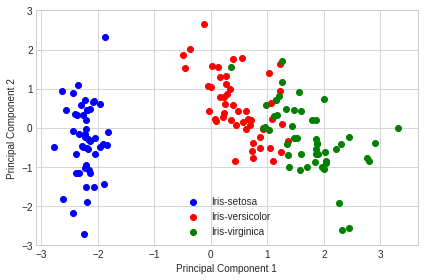

In [10]:
import matplotlib.pyplot as plt

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), ('blue', 'red', 'green')):
        plt.scatter(Y[y==lab, 0], Y[y==lab, 1], label=lab, c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

### <u>Shortcut - PCA in scikit-learn</u>


In [11]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X)

sklearn_pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

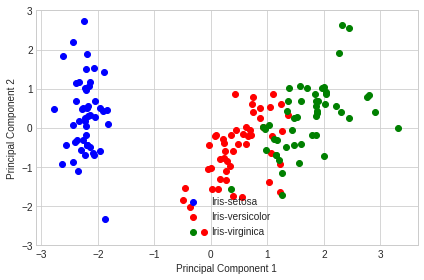

In [12]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

<a id="PCA to Speed-up Machine Learning Algorithms"></a>

### <u>Application 2 - PCA to Speed-up Machine Learning Algorithms </u>

The MNIST database of handwritten digits has 784 feature columns/ dimensions, a training set of 60,000 examples, and a test set of 10,000 examples.

In [13]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [14]:
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split( X, y, test_size=0.15, random_state=0)

In [15]:
from sklearn.decomposition import PCA

# scikit-learn choose the minimum number of principal components such that 95% of the variance is retained.
pca = PCA(0.95)
pca.fit(train_img)
print(pca.n_components_)
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

154


Time stats

The table below shows how long it took to fit logistic regression on kaggle kernel after using PCA (retaining different amounts of variance each time).

| Variance Retained | Number of Components | Time (Seconds) | Accuracy
| --- | --- | --- | --- |
| Without PCA | -- |153 | 0.9096 |
| 0.99 | 331 | 75 |0.7789
| 0.95 |154 | 55 |0.9050
| 0.90 |87 | 28 |0.9030
| 0.85 |59 | 20 |0.897

<a id="Incremental PCA"></a>
### <u> Incremental PCA </u>

PCA requires the whole training set to fit in memory. Incremental PCA splits the training set into mini-batches. This is useful for large training sets, and also to apply PCA online (i.e., on the fly, as new instances arrive).

In [16]:
from sklearn.decomposition import IncrementalPCA
n_batches = 100

inc_pca = IncrementalPCA(n_components=154)

for X_batch in np.array_split(train_img, n_batches):
        inc_pca.partial_fit(X_batch)
        
X_mnist_reduced = inc_pca.transform(train_img)

<a id="Manifold Learning"></a>
## <u> Manifold Learning </u>

<a id="t-SNE"></a>
### <u> t-SNE </u>

- t-SNE map points in high dimensional space to a lower dimension so that the distances between the points remains almost the same.

- t-SNE, unlike PCA, is not a linear projection. It uses the local relationships between points to create a low-dimensional mapping. This allows it to capture non-linear structure.
- t-SNE creates a probability distribution using the Gaussian distribution that defines the relationships between the points in high-dimensional space.
- t-SNE uses the Student t-distribution to recreate the probability distribution in low-dimensional space.
- t-SNE optimizes the embeddings directly using gradient descent. The cost function is non-convex though, meaning there is the risk of getting stuck in local minima. This fact has an important consequence: t-SNE is non-deterministic. While running it multiple times, we may get different results each time.

t-SNE uses “stochastic neighbors” which means that there is no clear line between which points are neighbors of the other points. This lack of clear borders allows t-SNE to naturally take both global and local structure into account. Local structure is more important than global structure, but points that are far away are not completely ignored, allowing for a “well-balanced” dimensionality reduction.

#### <u>t-SNE Algorithm </u>:

<b>Step 1 </b> : In the high-dimensional space, create a probability distribution that dictates the relationships between various neighboring points

<b>Step 2 </b>: It then tries to recreate a low dimensional space that follows that probability distribution as best as possible.

#### <u> Why do we need t-SNE? </u>

PCA can’t capture non-linear dependencies. For instance, PCA would not be able to “unroll” the following structure.

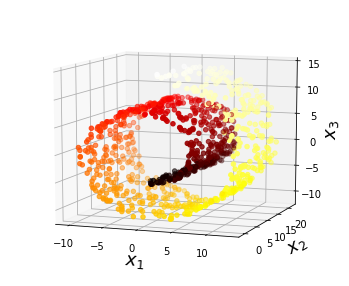

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_swiss_roll

X, y = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

A linear projection is like casting a shadow. Unlike PCA, t-SNE is not limited to linear projections, which makes it suited to all sorts of datasets.

In [18]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
X_reduced = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.003s...
[t-SNE] Computed neighbors for 1000 samples in 0.023s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.963165
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.450928
[t-SNE] KL divergence after 300 iterations: 0.597087


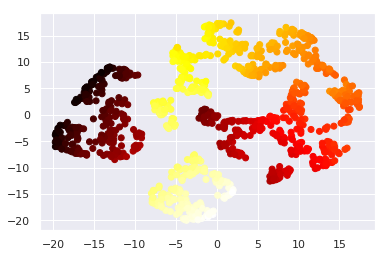

In [19]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

#ax = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue = y)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.hot)

<a id="Kernel PCA"></a>
### <u>  Kernel PCA </u>

Kernel PCA can perform complex nonlinear projections for dimensionality reduction. It is often good at preserving clusters of instances after projection, or sometimes even unrolling datasets that lie close to a twisted manifold.

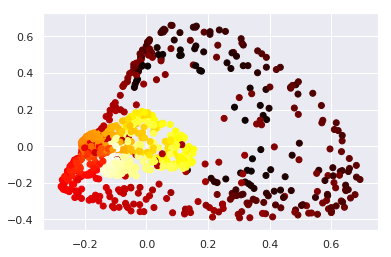

In [20]:
from sklearn.decomposition import KernelPCA
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

#ax = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue = y)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.hot)

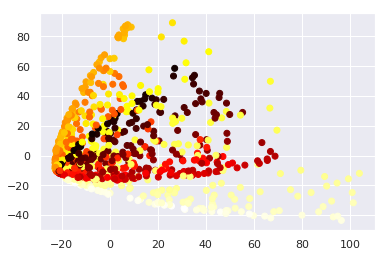

In [21]:
from sklearn.decomposition import KernelPCA
rbf_pca = KernelPCA(n_components = 2, kernel="poly", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

#ax = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue = y)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.hot)

<a id="LLE"></a>
### <u> LLE </u>

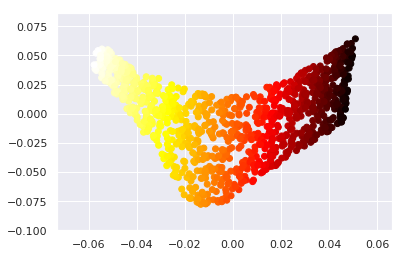

In [22]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced = lle.fit_transform(X)
X_reduced.shape

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

#ax = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue = y)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.hot)

<a id="Isomap"></a>
### <u> Isomap </u>

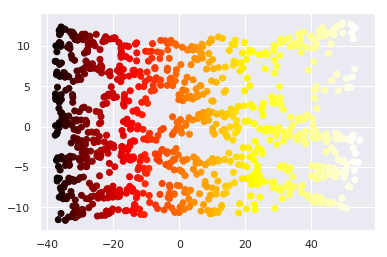

In [23]:
from sklearn.manifold import Isomap
isomap = Isomap(n_components=2, n_neighbors=10)
X_reduced = isomap.fit_transform(X)
X_reduced.shape

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

#ax = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue = y)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.hot)

#### End
If you reached this far please comment and upvote this kernel, feel free to make improvements on the kernel and please share if you found anything useful !